<h4><b><u>Importing the required libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import (LabelEncoder, StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import(confusion_matrix,ConfusionMatrixDisplay, classification_report)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


<h4><b><u>Importing the data

In [11]:
telco_csv = pd.read_csv("./data_telco_customer_churn.csv", sep=',')

<h4><b><u>Converting it in to a DataFrame

In [12]:
telco_df = pd.DataFrame(telco_csv)
telco_df.shape

(4930, 11)

In [13]:
telco_df.isna().sum()           #Checking for any NA values

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [14]:
#Statistics
telco_df.count()

Dependents          4930
tenure              4930
OnlineSecurity      4930
OnlineBackup        4930
InternetService     4930
DeviceProtection    4930
TechSupport         4930
Contract            4930
PaperlessBilling    4930
MonthlyCharges      4930
Churn               4930
dtype: int64

<h4><b><u>Encoding the Categorical datas' into numerical data

In [15]:
encoder = LabelEncoder()

dependent_encoded =encoder.fit_transform(telco_df['Dependents'])
onlineSec_encoded =encoder.fit_transform(telco_df['OnlineSecurity'])
onlineBack_encoded =encoder.fit_transform(telco_df['OnlineBackup'])
internetServ_encoded = encoder.fit_transform(telco_df['InternetService'])
deviceProc_encoded = encoder.fit_transform(telco_df['DeviceProtection'])
tech_encoded = encoder.fit_transform(telco_df['TechSupport'])
contract_encoded = encoder.fit_transform(telco_df['Contract'])
paperless_encoded = encoder.fit_transform(telco_df['PaperlessBilling'])
churn_encoded = encoder.fit_transform(telco_df['Churn'])

The features are encoded as: <br>
    *<u>Dependent</u><br>| Yes -> 1<br>| No -> 0<br><br>
    *<u>OnlineSecurity</u><br>|Yes -> 2<br>| No internet service -> 1 <br>No -> 0<br><br>
    *<u>OnlineBackUp</u><br>|Yes -> 2<br>| No internet service -> 1 <br>No -> 0<br><br>
    *<u>InternetService</u><br>|No -> 2<br>| Fiber Optic -> 1 <br>DSL -> 0<br><br>
    *<u>DeviceProtection</u><br>|Yes -> 2<br>| No internet service -> 1 <br>No -> 0<br><br>
    *<u>TechSupport</u><br>|Yes -> 2<br>| No internet service -> 1 <br>No -> 0<br><br>
    *<u>Contract</u><br>|Two year -> 2<br>| One year -> 1 <br>Month-to-month -> 0<br><br>
    *<u>PaperlessBilling</u><br>| Yes -> 1<br>| No -> 0<br><br>
    *<u>Churn</u><br>| Yes -> 1<br>| No -> 0<br><br>

In [16]:
#for original , encoded in zip(telco_df['Churn'], churn_encoded):
#    print(original, '->', encoded)

<h4><b><u>Updating the Columns byy replacing categorical data with the corresponding numerical data </u></b></h4>

In [17]:
telco_df['Dependents'] = dependent_encoded
telco_df['Contract'] = contract_encoded
telco_df['DeviceProtection'] = deviceProc_encoded
telco_df['InternetService'] = internetServ_encoded
telco_df['OnlineBackup'] = onlineBack_encoded
telco_df['OnlineSecurity'] = onlineSec_encoded
telco_df['PaperlessBilling'] = paperless_encoded
telco_df['TechSupport'] = tech_encoded
telco_df['Churn'] = churn_encoded

telco_df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,9,0,0,0,2,2,0,1,72.90,1
1,0,14,0,2,1,2,0,0,1,82.65,0
2,0,64,2,0,0,2,2,2,0,47.85,1
3,0,72,2,2,0,2,2,2,0,69.65,0
4,0,3,1,1,2,1,1,0,1,23.60,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,15,0,0,1,2,2,0,1,103.45,0
4926,1,10,0,0,1,2,2,0,1,91.10,0
4927,0,58,1,1,2,1,1,2,0,20.75,0
4928,0,1,0,0,1,0,0,0,1,69.75,1


<h4><b><u>Scaling the data present in the tenure and MonthlyCharges columns to ensure uniformity and unbias</u></b></h4>

In [18]:
scaler = StandardScaler()
tenure_scaled =scaler.fit_transform(pd.DataFrame(telco_df['tenure']))
monthly_scaled =scaler.fit_transform(pd.DataFrame(telco_df['MonthlyCharges']))


telco_df['tenure'] = tenure_scaled
telco_df['MonthlyCharges'] = monthly_scaled

telco_df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,-0.955202,0,0,0,2,2,0,1,0.267938,1
1,0,-0.751110,0,2,1,2,0,0,1,0.593797,0
2,0,1.289814,2,0,0,2,2,2,0,-0.569268,1
3,0,1.616362,2,2,0,2,2,2,0,0.159319,0
4,0,-1.200113,1,1,2,1,1,0,1,-1.379738,0
...,...,...,...,...,...,...,...,...,...,...,...
4925,0,-0.710291,0,0,1,2,2,0,1,1.288963,0
4926,1,-0.914384,0,0,1,2,2,0,1,0.876208,0
4927,0,1.044903,1,1,2,1,1,2,0,-1.474989,0
4928,0,-1.281750,0,0,1,0,0,0,1,0.162661,1


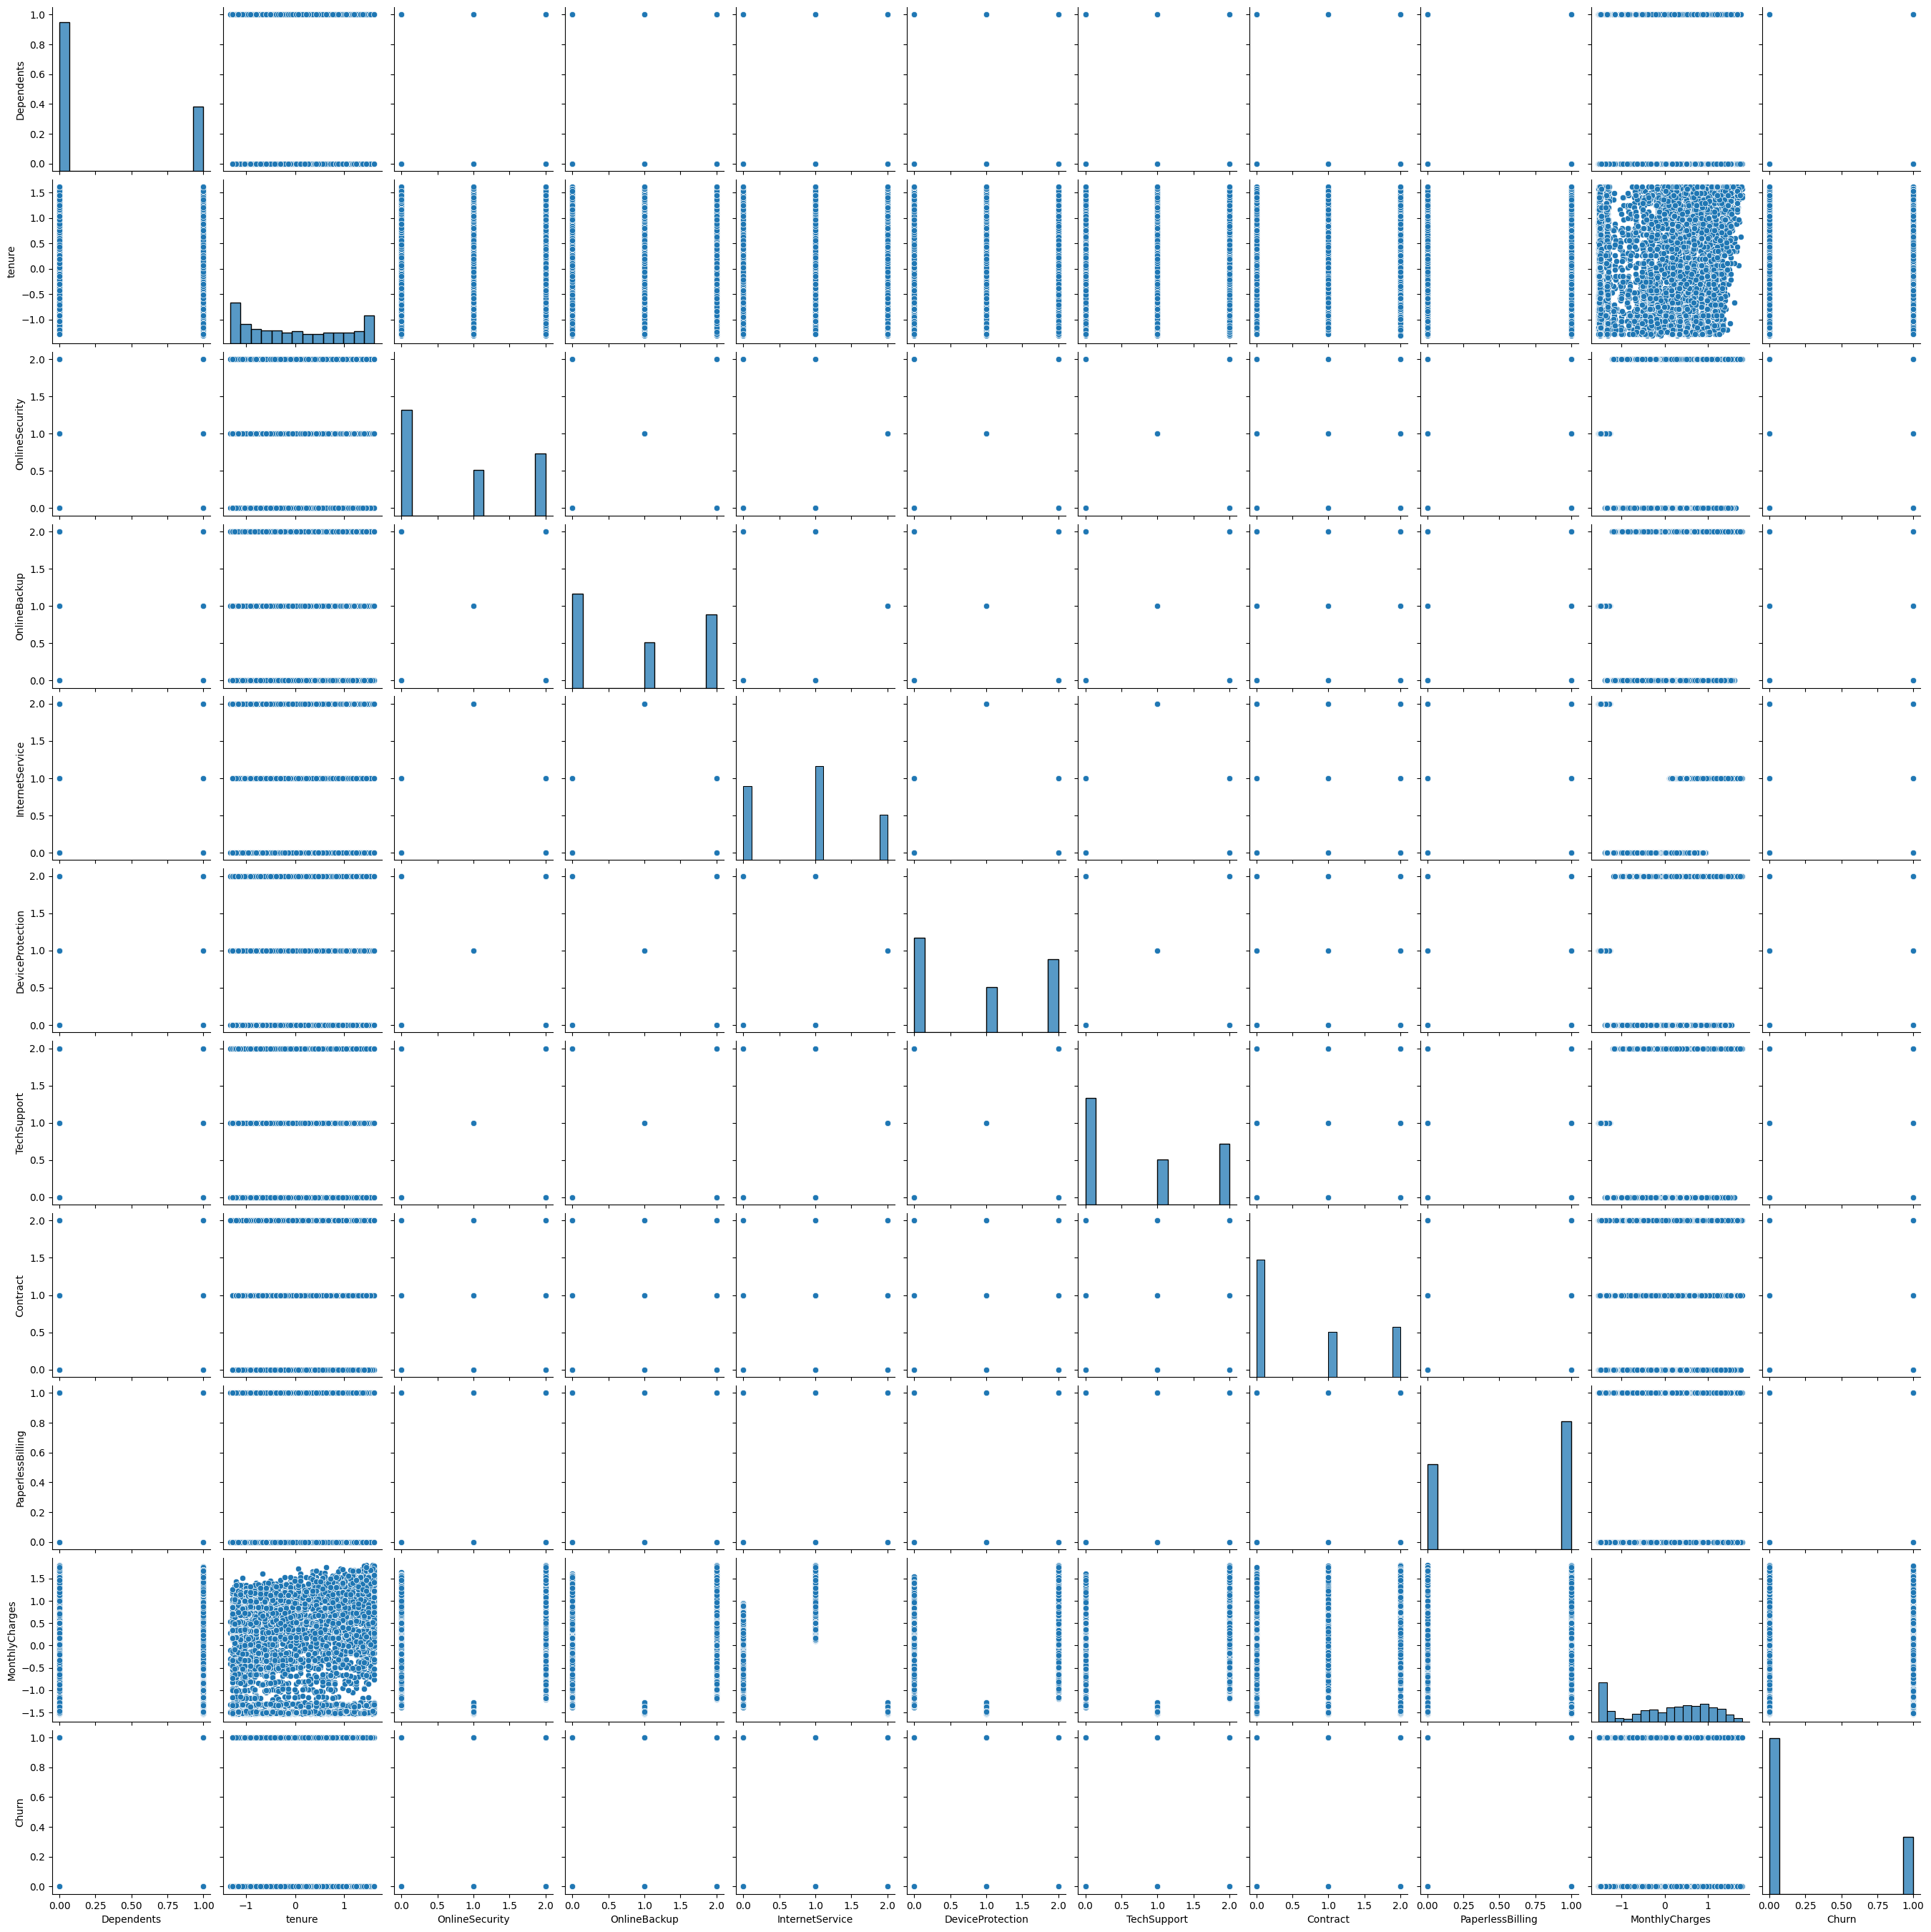

In [42]:
sea.pairplot(data=telco_df) #Plotting the numerical values

<h4><b><u>Splitting up of the dataframe into 2 arrays in order to split it</u></b></h4>

In [20]:
telco_data = telco_df[['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'InternetService',	'DeviceProtection',	'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']]
telco_target = telco_df[['Churn']]

Splitting the Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(telco_data, telco_target, train_size=0.8, test_size=0.2, random_state=39)

print(Y_train.shape[0])

3944


<h3><b><u>Taining the SVC model after the Y_train has been reshaped into the required shape</u></b></h3>

In [22]:
#SVC Model
Y_train_reshaped = np.reshape(Y_train, Y_train.shape[0])

svc = SVC(class_weight='balanced')

model = svc.fit(X_train,Y_train_reshaped)

Y_pred = model.predict(X_test)

Confusion Matrix

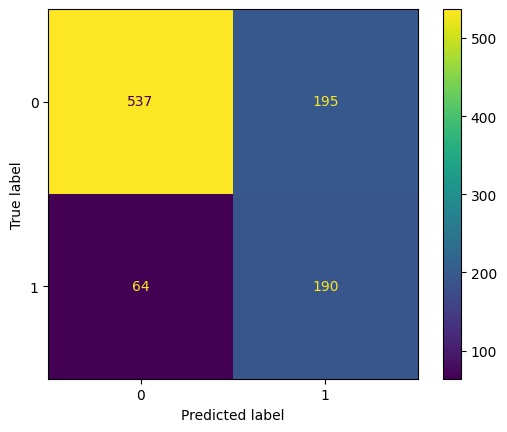

In [23]:
confuse_mat = confusion_matrix(Y_test, Y_pred)
confuse_matDisp = ConfusionMatrixDisplay(confuse_mat)
confuse_matDisp.plot()

<b>Classification Report</b>

In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.81       732
           1       0.49      0.75      0.59       254

    accuracy                           0.74       986
   macro avg       0.69      0.74      0.70       986
weighted avg       0.79      0.74      0.75       986



<h2><b><u>Over Sampling inorder to increase the F1-Score</u></b></h2>

In [25]:
smote = SMOTE(sampling_strategy=0.7, random_state=39)
X_train_oversampled, Y_train_oversampled = smote.fit_resample(X_train, Y_train)

In [26]:
Y_train_oversampled_reshaped = np.reshape(Y_train_oversampled, Y_train_oversampled.shape[0])

svc_over_boosted = SVC(class_weight='balanced', random_state=39)


over_boosted_model = svc_over_boosted.fit(X_train_oversampled, Y_train_oversampled_reshaped)

Y_pred_over_boosted = over_boosted_model.predict(X_test)

In [27]:
print(classification_report(Y_test, Y_pred_over_boosted))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       732
           1       0.49      0.76      0.60       254

    accuracy                           0.74       986
   macro avg       0.69      0.74      0.70       986
weighted avg       0.79      0.74      0.75       986



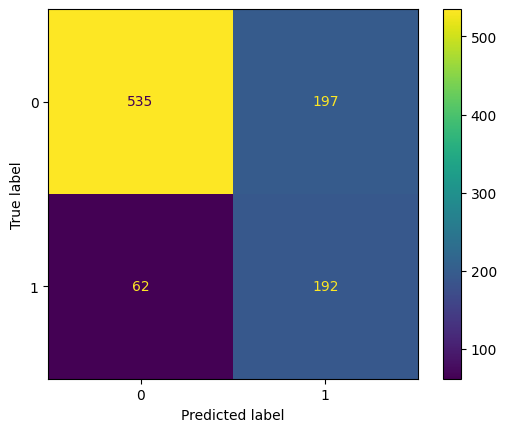

In [28]:
confuse_mat = confusion_matrix(Y_test, Y_pred_over_boosted)
confuse_matDisp = ConfusionMatrixDisplay(confuse_mat)
confuse_matDisp.plot()

<h2><b><u>Under Sampling inorder to increase the F1-Score</u></b></h2>

In [29]:
undersample = NearMiss(version=1)
X_train_undersampled, Y_train_undersampled = undersample.fit_resample(X_train, Y_train)

In [30]:
svc_under_boosted = SVC(class_weight='balanced', random_state=39)
Y_train_undersampled_reshaped = np.reshape(Y_train_undersampled, Y_train_undersampled.shape[0])

under_boosted_model = svc_under_boosted.fit(X_train_undersampled, Y_train_undersampled_reshaped)

Y_pred_under_boosted = under_boosted_model.predict(X_test)


In [31]:
print(classification_report(Y_test, Y_pred_under_boosted))

              precision    recall  f1-score   support

           0       0.83      0.43      0.57       732
           1       0.32      0.75      0.44       254

    accuracy                           0.52       986
   macro avg       0.57      0.59      0.51       986
weighted avg       0.70      0.52      0.54       986



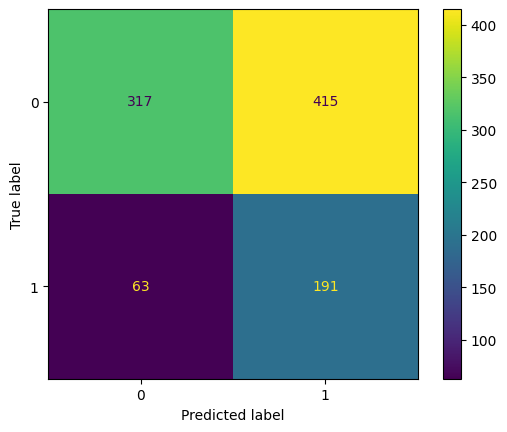

In [32]:
confuse_mat = confusion_matrix(Y_test, Y_pred_under_boosted)
confuse_matDisp = ConfusionMatrixDisplay(confuse_mat)
confuse_matDisp.plot()

<h2><b><u>Under Sampling the Over Sampled data inorder to increase the F1-Score</u></b></h2>

In [33]:
undersample = NearMiss(version=1)
X_train_overundersampled, Y_train_overundersampled = undersample.fit_resample(X_train_oversampled, Y_train_oversampled)

In [34]:
svc_overunder_boosted = SVC(class_weight='balanced', random_state=39)
Y_train_overundersampled_reshaped = np.reshape(Y_train_overundersampled, Y_train_overundersampled.shape[0])

overunder_boosted_model = svc_overunder_boosted.fit(X_train_overundersampled, Y_train_overundersampled_reshaped)

Y_pred_overunder_boosted = overunder_boosted_model.predict(X_test)

In [35]:
print(classification_report(Y_test, Y_pred_overunder_boosted))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       732
           1       0.51      0.72      0.60       254

    accuracy                           0.75       986
   macro avg       0.70      0.74      0.71       986
weighted avg       0.79      0.75      0.76       986



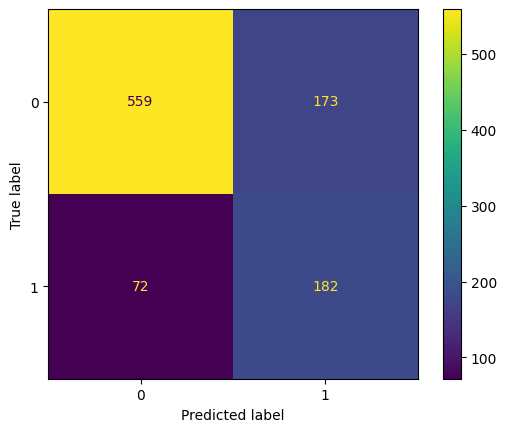

In [36]:
confuse_mat = confusion_matrix(Y_test, Y_pred_overunder_boosted)
confuse_matDisp = ConfusionMatrixDisplay(confuse_mat)
confuse_matDisp.plot()

<h2><b><u>Over Sampling the Under Sampled data inorder to increase the F1-Score</u></b></h2>

In [37]:
undersample = NearMiss(version=1)
X_train_undersampled, Y_train_undersampled = undersample.fit_resample(X_train, Y_train)

In [38]:
smote = SMOTE(sampling_strategy='minority', random_state=39)
X_train_underoversampled, Y_train_underoversampled = smote.fit_resample(X_train_undersampled, Y_train_undersampled)

In [39]:
Y_train_underoversampled_reshaped = np.reshape(Y_train_underoversampled, Y_train_underoversampled.shape[0])

svc_underover_boosted = SVC(class_weight='balanced', random_state=39)


underover_boosted_model = svc_underover_boosted.fit(X_train_underoversampled, Y_train_underoversampled_reshaped)

Y_pred_underover_boosted = underover_boosted_model.predict(X_test)

In [40]:
print(classification_report(Y_test, Y_pred_underover_boosted))

              precision    recall  f1-score   support

           0       0.83      0.43      0.57       732
           1       0.32      0.75      0.44       254

    accuracy                           0.52       986
   macro avg       0.57      0.59      0.51       986
weighted avg       0.70      0.52      0.54       986



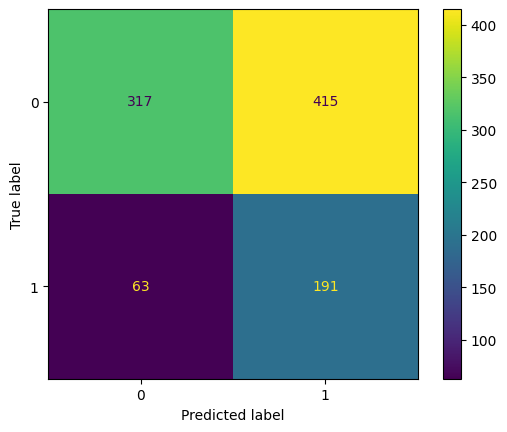

In [41]:
confuse_mat = confusion_matrix(Y_test, Y_pred_underover_boosted)
confuse_matDisp = ConfusionMatrixDisplay(confuse_mat)
confuse_matDisp.plot()

<h3><b><i>Conclusion</i></b></h3>
After all attempts to increase the F1-Score of both the 0 and 1 class (Corresponding to the Churn of NO and YES respectively) by over sampling, under sampling and mixture of 2, It is evident by comparing the classification reports that training the model on Under Sampling of Over Sampled data yields to the best F1-Score of :<br>
0.82 for 0 Class (Churn of No)<br>
0.60 for 1 Class (Churn of Yes)